In [14]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
cars_data= pd.read_csv('Cars.csv')
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


## 3 Initial Analysis

In [3]:
cars_data.shape

(81, 5)

In [5]:
cars_data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [6]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

### Assumptions Check

1. Linearity check : by using scatterplot or pairplot

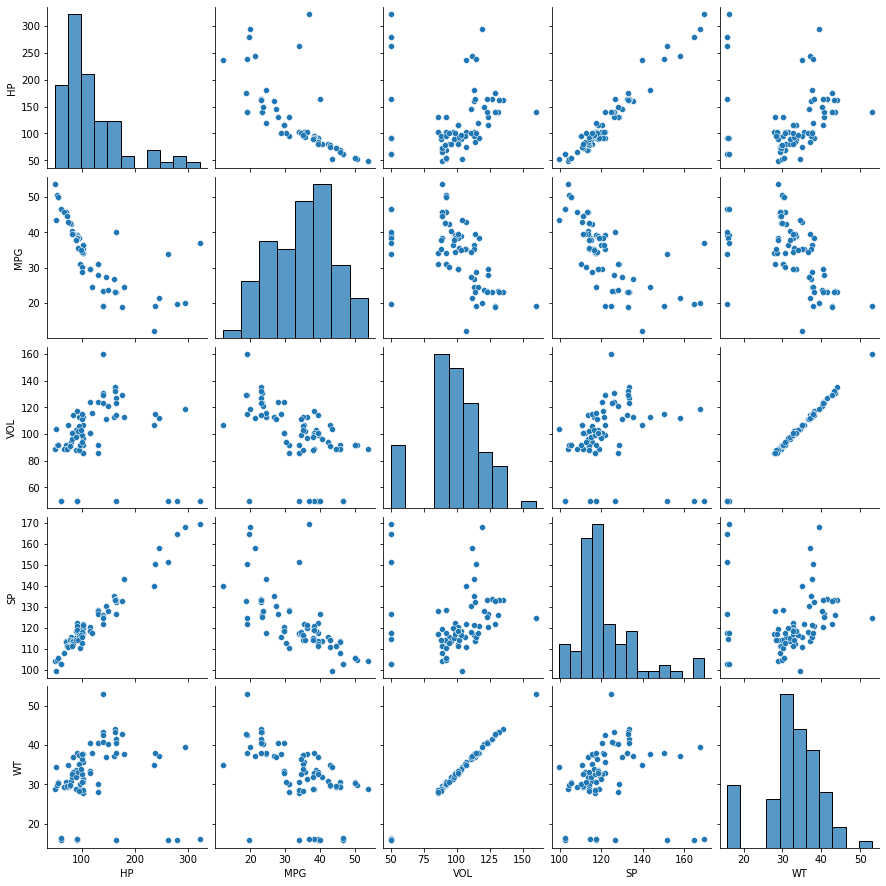

In [9]:
sns.pairplot(cars_data)

### observation - Linearity check is fail
no multicolinearity - by using corelation matrix or VIF VAriance Inflation Factor


In [12]:
corr_matrix= cars_data.corr().round(2)
corr_matrix

,HP,MPG,VOL,SP,WT
HP,1.00,-0.73,0.08,0.97,0.08
MPG,-0.73,1.00,-0.53,-0.69,-0.53
VOL,0.08,-0.53,1.00,0.10,1.00
SP,0.97,-0.69,0.10,1.00,0.10
WT,0.08,-0.53,1.00,0.10,1.00


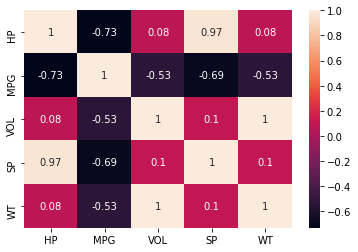

In [16]:
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

### no multicolinearity - Fails

### no autoregression - satisfied


### homoscadicity & zero residual mean  - we can check later

#### 4. MODEL BUILDING | Training | Evaluating using stats models

In [19]:
import statsmodels.formula.api as smf
model_1= smf.ols('MPG~HP+VOL+SP+WT',data=cars_data).fit()

In [20]:
model_1.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [22]:
model_1.pvalues # to know whether the input paramete is significant or not

Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64

#### =====================================================

### hypothesis Formulation:
#### H0: It is not a significant parameter.
Ha:It is a significant parameter.

#### =================================================

In [25]:
model_1.rsquared,model_1.rsquared_adj   # the contribution of the total input features for the prediction

(0.7705372737359844, 0.7584602881431415)

#### understanding R2 AND adjustedR2

In [34]:
model_1= smf.ols('MPG~HP',data=cars_data).fit()
model_1.rsquared,model_1.rsquared_adj,model_1.aic,model_1.bic

(0.5256806086282022, 0.5196765656994453, 530.7452702659343, 535.5341685752792)

In [33]:
model_2= smf.ols('MPG~HP+SP',data=cars_data).fit()
model_2.rsquared,model_2.rsquared_adj,model_2.aic,model_2.bic

(0.532639171285165, 0.520655560292477, 531.5481466080847, 538.731494072102)

In [32]:
model_3= smf.ols('MPG~HP+SP+WT',data=cars_data).fit()
model_3.rsquared,model_3.rsquared_adj,model_3.aic,model_3.bic

(0.7694828139983458,
 0.7605016249333464,
 476.29927501529767,
 485.87707163398744)

In [35]:
model_4= smf.ols('MPG~HP+SP+WT+VOL',data=cars_data).fit()
model_4.rsquared,model_4.rsquared_adj,model_4.aic,model_4.bic

(0.7705372737359844, 0.7584602881431415, 477.9279049354879, 489.9001507088501)

#### observation:
* always r2 score increases if we increases number of inputs
and if the input contributes more for prediction then R2 score increases more

### to look the complete summary of the model

In [36]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     87.55
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           1.96e-14
Time:                        21:51:56   Log-Likelihood:                -263.37
No. Observations:                  81   AIC:                             530.7
Df Residuals:                      79   BIC:                             535.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.0392      1.616     29.722      0.000      44.822      51.256
HP            -0.1159      0.012     -9.357      0.000      -0.141      -0.091
==============================================================================
Omnibus:                       20.653   Durbin-Watson:                   1.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.053
Skew:                           0.949   Prob(JB):                     9.00e-09
Kurtosis:                       5.716   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     44.45
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           1.31e-13
Time:                        21:52:14   Log-Likelihood:                -262.77
No. Observations:                  81   AIC:                             531.5
Df Residuals:                      78   BIC:                             538.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0209     20.495      1.270      0.208     -14.782      66.824
HP            -0.1731      0.054     -3.178      0.002      -0.282      -0.065
SP             0.2364      0.219      1.078      0.285      -0.200       0.673
==============================================================================
Omnibus:                       27.260   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.523
Skew:                           1.214   Prob(JB):                     1.45e-12
Kurtosis:                       6.204   Cond. No.                     5.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     85.68
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           1.81e-24
Time:                        21:52:33   Log-Likelihood:                -234.15
No. Observations:                  81   AIC:                             476.3
Df Residuals:                      77   BIC:                             485.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7848     14.490      1.986      0.051      -0.069      57.639
HP            -0.2085      0.039     -5.386      0.000      -0.286      -0.131
SP             0.4078      0.156      2.609      0.011       0.097       0.719
WT            -0.5994      0.067     -8.895      0.000      -0.734      -0.465
==============================================================================
Omnibus:                       10.924   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.048
Skew:                           0.705   Prob(JB):                      0.00242
Kurtosis:                       4.257   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           1.54e-23
Time:                        21:52:51   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## TAKEAWAY:

Here wrt to few datapoints, it is evident that most of the input features are not showing direct linear relationship with output varible. So we have to do some transformations to make to linear.

#### Data transformation techniques if the data is CONTINUOUS:

* Log Transformation
* Square Root Transformation
* Cube Root Transformation
* Reciprocal Transformation
* Boxcox Transformation
* Standard Scaler
* Min Max Scaler
* Robust Scaler

### Data transformation techniques if the data is DISCRETE:

* Label Encoding
* One Hot Encoding
##### 

Applying Log transformation for the input features


In [40]:
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [42]:
import numpy as np
cars_data['log HP'] =np.log(cars_data['HP'])
cars_data['log VOL'] =np.log(cars_data['VOL'])
cars_data['log SP'] =np.log(cars_data['SP'])
cars_data['log WT'] =np.log(cars_data['WT'])
cars_data

,HP,MPG,VOL,SP,WT,log HP,log VOL,log SP,log WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352


In [45]:
cars_data_log_transformed =cars_data.loc[:,'log HP':'log VOL','log WT','log SP']
cars_data_log_transformed

IndexingError: Too many indexers

In [47]:
sns.scatterplot(cars_data)

C:\Users\avita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index